# Project 2

In [1]:
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

import pickle
import os
from statsmodels.formula.api import ols

In [2]:
#Data Files
# data/
#     bom.movie_gross.csv
#     im.db -> SQL
#     rt.movie_info.tsv
#     rt.reviews.tsv
#     tmdb.movies.csv
#     tn.movie_budgets.csv


## Importing Datasets

### IMDB

In [3]:
im_db = 'data/im.db'

im_db_conn = sqlite3.connect(im_db)

q = """

SELECT *
FROM sqlite_master


;
"""

pd.read_sql(q, im_db_conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


### Gross

In [4]:
gross_df = pd.read_csv("data/bom.movie_gross.csv")
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### Movie Info

In [5]:
rt_movie_info_df = pd.read_csv("data/rt.movie_info.tsv", delimiter = "\t")
rt_movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


### Reviews

In [6]:
rt_reviews_df = pd.read_csv("data/rt.reviews.tsv", delimiter = "\t",encoding='latin1')
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


### Movies

In [7]:
movies_df = pd.read_csv("data/tmdb.movies.csv")
movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


### Movie Budgets

In [8]:
budgets_df = pd.read_csv("data/tn.movie_budgets.csv")
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Data Understanding

In [9]:
budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [10]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [11]:
movies_df.rename(columns = {'original_title':'movie'},inplace = True)
movies_df.shape

(26517, 10)

In [12]:
budgets_df.shape

(5782, 6)

In [13]:
movies_and_budgets_df = movies_df.merge(budgets_df, how='inner', on = 'movie')
movies_and_budgets_df.head()

,Unnamed: 0,genre_ids,id_x,original_language,movie,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,"Mar 26, 2010","$165,000,000","$217,581,232","$494,870,992"
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"
2,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995","$30,000,000","$191,796,233","$364,545,516"
3,2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995","$30,000,000","$191,796,233","$364,545,516"
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"


In [14]:
rotten_tomatoes_df = rt_reviews_df.merge(rt_movie_info_df, how='inner', on = 'id')
rotten_tomatoes_df.head()

,id,review,rating_x,fresh,critic,top_critic,publisher,date,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [15]:
movies_and_budgets_df.shape

(2316, 15)

In [16]:
rotten_tomatoes_df.shape

(54432, 19)

In [17]:
movies_and_budgets_df.info()
#genre_ids -> rec
#popularity -> ev
#release_date -> rec
#production_budget -> rec
#domestic_gross -> ev
#worldwide_gross -> ev

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 2315
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2316 non-null   int64  
 1   genre_ids          2316 non-null   object 
 2   id_x               2316 non-null   int64  
 3   original_language  2316 non-null   object 
 4   movie              2316 non-null   object 
 5   popularity         2316 non-null   float64
 6   release_date_x     2316 non-null   object 
 7   title              2316 non-null   object 
 8   vote_average       2316 non-null   float64
 9   vote_count         2316 non-null   int64  
 10  id_y               2316 non-null   int64  
 11  release_date_y     2316 non-null   object 
 12  production_budget  2316 non-null   object 
 13  domestic_gross     2316 non-null   object 
 14  worldwide_gross    2316 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 289.5+ KB


In [18]:
rotten_tomatoes_df.info()
#rating_x -> ev
#genre -> rec
#runtime -> rec
#theatre_date -> rec
#studio -> rec

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54432 entries, 0 to 54431
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54432 non-null  int64 
 1   review        48869 non-null  object
 2   rating_x      40915 non-null  object
 3   fresh         54432 non-null  object
 4   critic        51710 non-null  object
 5   top_critic    54432 non-null  int64 
 6   publisher     54123 non-null  object
 7   date          54432 non-null  object
 8   synopsis      54300 non-null  object
 9   rating_y      54346 non-null  object
 10  genre         54345 non-null  object
 11  director      48992 non-null  object
 12  writer        45206 non-null  object
 13  theater_date  53206 non-null  object
 14  dvd_date      53206 non-null  object
 15  currency      33310 non-null  object
 16  box_office    33310 non-null  object
 17  runtime       53594 non-null  object
 18  studio        40125 non-null  object
dtypes: i

## Data Preperation

In [19]:
#Drop columns with no box_office data
rotten_tomatoes_df.dropna(subset=['box_office','runtime','theater_date'],inplace = True)

In [20]:
#Convert strings to ints
def clean_and_convert_to_int(dataframe, columns_to_clean):
    for col in columns_to_clean:
        dataframe[col] = dataframe[col].str.replace(r'[\$,\D]', "", regex=True)
        dataframe[col] = pd.to_numeric(dataframe[col], errors='coerce')
        dataframe[col] = dataframe[col].astype(int)  # Use 'Int64' to handle NaN as nullable integers
    return dataframe

# List of columns to clean and convert to integers
movies_and_budgets_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']
rotten_tomatoes_columns = ['box_office', 'runtime']

# Call the function for each DataFrame
movies_and_budgets_df = clean_and_convert_to_int(movies_and_budgets_df, movies_and_budgets_columns)
rotten_tomatoes_df = clean_and_convert_to_int(rotten_tomatoes_df, rotten_tomatoes_columns)

In [21]:
rotten_tomatoes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33017 entries, 0 to 54317
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            33017 non-null  int64 
 1   review        31864 non-null  object
 2   rating_x      25319 non-null  object
 3   fresh         33017 non-null  object
 4   critic        31799 non-null  object
 5   top_critic    33017 non-null  int64 
 6   publisher     32813 non-null  object
 7   date          33017 non-null  object
 8   synopsis      33017 non-null  object
 9   rating_y      33017 non-null  object
 10  genre         33017 non-null  object
 11  director      29176 non-null  object
 12  writer        27448 non-null  object
 13  theater_date  33017 non-null  object
 14  dvd_date      33017 non-null  object
 15  currency      33017 non-null  object
 16  box_office    33017 non-null  int64 
 17  runtime       33017 non-null  int64 
 18  studio        30755 non-null  object
dtypes: i

In [22]:
movies_and_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 2315
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2316 non-null   int64  
 1   genre_ids          2316 non-null   object 
 2   id_x               2316 non-null   int64  
 3   original_language  2316 non-null   object 
 4   movie              2316 non-null   object 
 5   popularity         2316 non-null   float64
 6   release_date_x     2316 non-null   object 
 7   title              2316 non-null   object 
 8   vote_average       2316 non-null   float64
 9   vote_count         2316 non-null   int64  
 10  id_y               2316 non-null   int64  
 11  release_date_y     2316 non-null   object 
 12  production_budget  2316 non-null   int64  
 13  domestic_gross     2316 non-null   int64  
 14  worldwide_gross    2316 non-null   int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 289.5+ KB


In [23]:
#Adding columns for clearer picture
movies_and_budgets_df['foreign_gross'] =  movies_and_budgets_df['worldwide_gross'] - movies_and_budgets_df['domestic_gross']
movies_and_budgets_df['net_gross'] = movies_and_budgets_df['worldwide_gross'] - movies_and_budgets_df['production_budget']
movies_and_budgets_df['release_date_x'] = pd.to_datetime(movies_and_budgets_df['release_date_x'])
movies_and_budgets_df['release_month'] = movies_and_budgets_df['release_date_x'].dt.month
rotten_tomatoes_df['theater_date'] = pd.to_datetime(rotten_tomatoes_df['theater_date'])
rotten_tomatoes_df['theater_month'] = rotten_tomatoes_df['theater_date'].dt.month

#Important to know if worldwide_gross is net_gross or not

## Quick Graph Analysis

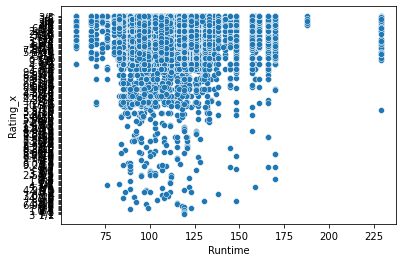

In [24]:
sns.scatterplot(data = rotten_tomatoes_df, x = 'runtime', y ='rating_x')
plt.xlabel('Runtime')
plt.ylabel('Rating_x')
plt.show()
#Based on graph below, rule run time out

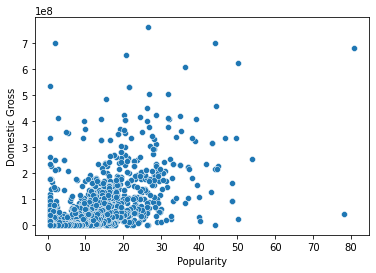

In [25]:
sns.scatterplot(data = movies_and_budgets_df, x = 'popularity', y ='domestic_gross')
plt.xlabel('Popularity')
plt.ylabel('Domestic Gross')
plt.show()

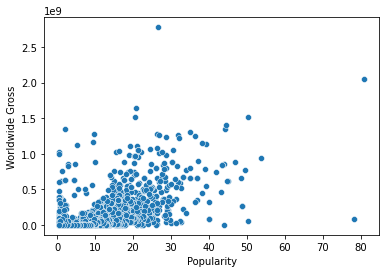

In [26]:
sns.scatterplot(data = movies_and_budgets_df, x = 'popularity', y ='worldwide_gross')
plt.xlabel('Popularity')
plt.ylabel('Worldwide Gross')
plt.show()

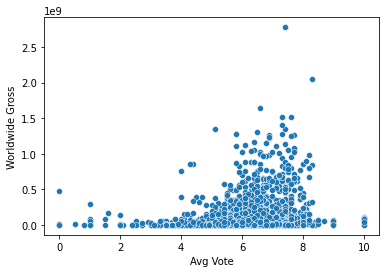

In [27]:
sns.scatterplot(data = movies_and_budgets_df, x = 'vote_average', y ='worldwide_gross')
plt.xlabel('Avg Vote')
plt.ylabel('Worldwide Gross')
plt.show()

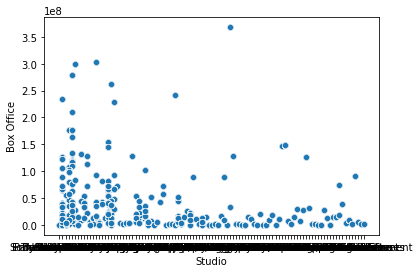

In [28]:
sns.scatterplot(data = rotten_tomatoes_df, x = 'studio', y ='box_office')
plt.xlabel('Studio')
plt.ylabel('Box Office')
plt.show()

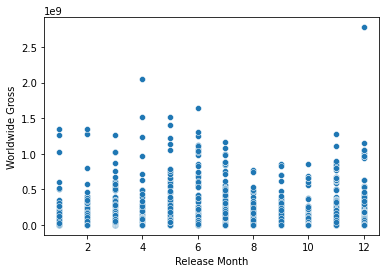

In [29]:
sns.scatterplot(data = movies_and_budgets_df, x = 'release_month', y ='worldwide_gross')
plt.xlabel('Release Month')
plt.ylabel('Worldwide Gross')
plt.show()

In [30]:
#Consolidate reviews into individual films
rotten_tomatoes_consolidated_df = rotten_tomatoes_df.groupby(by = ['id','theater_month']).sum()
rotten_tomatoes_consolidated_df

,,top_critic,box_office,runtime
id,theater_month,,,
3,8,34,97800000,17604
10,1,28,4431554820,8856
13,4,32,21290830,11685
14,6,18,5665968,4914
23,12,44,23105586897,30057
...,...,...,...,...
1976,2,32,171600650,15990
1980,9,38,4307108950,20230
1981,10,3,5664756,516


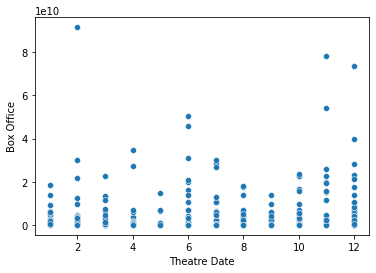

In [31]:
sns.scatterplot(data = rotten_tomatoes_consolidated_df, x = 'theater_month', y ='box_office')
plt.xlabel('Theatre Date')
plt.ylabel('Box Office')
plt.show()

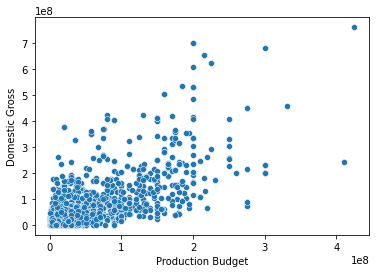

In [32]:
sns.scatterplot(data = movies_and_budgets_df, x = 'production_budget', y ='domestic_gross')
plt.xlabel('Production Budget')
plt.ylabel('Domestic Gross')
plt.show()

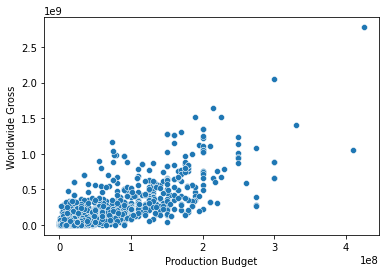

In [33]:
sns.scatterplot(data = movies_and_budgets_df, x = 'production_budget', y ='worldwide_gross')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.show()

In [34]:
movies_and_budgets_df['release_date_x']

0      2010-03-26
1      2010-05-07
2      1995-11-22
3      1995-11-22
4      2010-07-16
          ...    
2311   2018-03-04
2312   2018-03-04
2313   2018-03-22
2314   2018-04-07
2315   2018-05-29
Name: release_date_x, Length: 2316, dtype: datetime64[ns]

In [35]:
#Subset data by seasons
spring_m_b = movies_and_budgets_df.loc[(movies_and_budgets_df['release_date_x'].dt.month >= 3) & 
                                   (movies_and_budgets_df['release_date_x'].dt.month <= 5)]
summer_m_b = movies_and_budgets_df.loc[(movies_and_budgets_df['release_date_x'].dt.month >= 6) & 
                                   (movies_and_budgets_df['release_date_x'].dt.month <= 8)]
fall_m_b = movies_and_budgets_df.loc[(movies_and_budgets_df['release_date_x'].dt.month >= 9) & 
                                   (movies_and_budgets_df['release_date_x'].dt.month <= 11)]
winter_m_b = movies_and_budgets_df.loc[(movies_and_budgets_df['release_date_x'].dt.month == 12) | 
                                   (movies_and_budgets_df['release_date_x'].dt.month <= 2)]
winter_m_b['release_month'].value_counts()

12    225
1     169
2     142
Name: release_month, dtype: int64

In [36]:
# Define a custom function to map months to seasons
def get_season(month):
    if 3 <= month <= 5:
        return 'spring'
    elif 6 <= month <= 8:
        return 'summer'
    elif 9 <= month <= 11:
        return 'fall'
    else:
        return 'winter'

# Extract month from date_time and apply the custom function to create the 'seasons' column
movies_and_budgets_df['season'] = movies_and_budgets_df['release_date_x'].dt.month.apply(get_season)
movies_and_budgets_df.head()

,Unnamed: 0,genre_ids,id_x,original_language,movie,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross,foreign_gross,net_gross,release_month,season
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,"Mar 26, 2010",165000000,217581232,494870992,277289760,329870992,3,spring
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,"May 7, 2010",170000000,312433331,621156389,308723058,451156389,5,spring
2,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995",30000000,191796233,364545516,172749283,334545516,11,fall
3,2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995",30000000,191796233,364545516,172749283,334545516,11,fall
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,38,"Jul 16, 2010",160000000,292576195,835524642,542948447,675524642,7,summer


## Statistical Analysis

In [37]:
#ANOVA to see if significant difference between seasons. 
groups = {'spring':spring_m_b['worldwide_gross'], 'summer':summer_m_b['worldwide_gross'], 'fall':fall_m_b['worldwide_gross'],
          'winter':winter_m_b['worldwide_gross']}

alpha = 0.05

#unpacking the iterator instead of typing each out
result = stats.f_oneway(*groups.values())
f_stat, p = result
# Printing out the result
print(alpha)
print(result)
print("Significant if p < alpha and f_stat > alpha")

0.05
F_onewayResult(statistic=3.1414659308603934, pvalue=0.024338542268060964)
Significant if p < alpha and f_stat > alpha


In [38]:
#Find season with lowest worldwide_gross to set as reference for anova
movies_and_budgets_df.groupby(by='season').mean()

,Unnamed: 0,id_x,popularity,vote_average,vote_count,id_y,production_budget,domestic_gross,worldwide_gross,foreign_gross,net_gross,release_month
season,,,,,,,,,,,,
fall,11598.645441,221071.302460,11.131013,6.326194,1741.927641,51.619392,3.408582e+07,4.269462e+07,1.054556e+08,6.276099e+07,7.136979e+07,10.030391
spring,11476.447788,206739.978761,9.991412,6.137168,1643.534513,49.959292,3.887416e+07,4.693150e+07,1.174362e+08,7.050468e+07,7.856202e+07,3.893805
summer,11071.595420,200763.522901,10.885011,6.160305,1814.868321,50.309160,4.282141e+07,5.979514e+07,1.443727e+08,8.457752e+07,1.015512e+08,7.005725
winter,11590.212687,209967.229478,10.648819,6.169403,1645.641791,51.294776,3.698372e+07,5.108334e+07,1.183460e+08,6.726264e+07,8.136226e+07,5.882463


In [39]:
movies_and_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 0 to 2315
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         2316 non-null   int64         
 1   genre_ids          2316 non-null   object        
 2   id_x               2316 non-null   int64         
 3   original_language  2316 non-null   object        
 4   movie              2316 non-null   object        
 5   popularity         2316 non-null   float64       
 6   release_date_x     2316 non-null   datetime64[ns]
 7   title              2316 non-null   object        
 8   vote_average       2316 non-null   float64       
 9   vote_count         2316 non-null   int64         
 10  id_y               2316 non-null   int64         
 11  release_date_y     2316 non-null   object        
 12  production_budget  2316 non-null   int64         
 13  domestic_gross     2316 non-null   int64         
 14  worldwid

In [40]:
anova_season = ols('worldwide_gross ~C(season, Treatment("fall"))', data=movies_and_budgets_df).fit()
anova_season.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.141
Date:                Thu, 03 Aug 2023   Prob (F-statistic):             0.0243
Time:                        13:42:25   Log-Likelihood:                -47789.
No. Observations:                2316   AIC:                         9.559e+04
Df Residuals:                    2312   BIC:                         9.561e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                               1.055e+08   8.43e+06     12.513      0.000    8.89e+07    1.22e+08
C(season, Treatment("fall"))[T.spring]  1.198e+07   1.26e+07      0.953      0.340   -1.27e+07    3.66e+07
C(season, Treatment("fall"))[T.summer]  3.892e+07   1.28e+07      3.032      0.002    1.38e+07    6.41e+07
C(season, Treatment("fall"))[T.winter]  1.289e+07   1.28e+07      1.011      0.312   -1.21e+07    3.79e+07
==============================================================================
Omnibus:                     1855.605   Durbin-Watson:                   1.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44256.281
Skew:                           3.685   Prob(JB):                         0.00
Kurtosis:                      23.107   Cond. No.                         4.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the table above, we are comparing variance of the worldwide_gross from fall to spring, summer, and winter. Fall was selected as the reference season becuase it on average, has the lowest worldwide_gross. In the table above we note the following:
1. R^2 is low, meaning seasons account for .4% of variance in worldwide_gross, so this is not a good predictor.
2. p value for summer is extremely low, meaning the null must go. Therefore, summer months do have a significant positive effect on worldwide_gross, but b/c R^2 is so low, this is not worth a recommendation.

In [41]:
#Find season with lowest worldwide_gross to set as reference for anova
movies_and_budgets_df.groupby(by='release_month').mean()

,Unnamed: 0,id_x,popularity,vote_average,vote_count,id_y,production_budget,domestic_gross,worldwide_gross,foreign_gross,net_gross
release_month,,,,,,,,,,,
1,10743.313609,210224.591716,8.103118,5.771006,784.159763,51.940828,2.664473e+07,3.656013e+07,7.974138e+07,4.318125e+07,5.309665e+07
2,11795.971831,191199.309859,10.700176,6.008451,1642.253521,53.190141,3.419600e+07,4.808773e+07,1.083738e+08,6.028606e+07,7.417779e+07
3,12153.174528,216245.325472,9.625410,6.074528,1558.042453,50.084906,3.863909e+07,4.485167e+07,1.067626e+08,6.191095e+07,6.812353e+07
4,10944.960199,196462.308458,8.826915,6.231343,1118.522388,50.442786,2.644502e+07,3.403443e+07,8.600988e+07,5.197545e+07,5.956486e+07
5,11235.414474,207073.388158,12.041783,6.100000,2457.032895,49.144737,5.563794e+07,6.688699e+07,1.738801e+08,1.069931e+08,1.182422e+08
6,11335.624309,200311.292818,10.629414,6.188950,1978.121547,49.712707,4.735450e+07,7.068731e+07,1.731307e+08,1.024434e+08,1.257762e+08
7,10869.283019,194686.308176,12.183553,6.201258,2291.062893,49.861635,5.073915e+07,7.017936e+07,1.803477e+08,1.101683e+08,1.296085e+08
8,10986.695652,206459.885870,10.014332,6.096739,1242.782609,51.282609,3.152027e+07,4.010723e+07,8.499636e+07,4.488913e+07,5.347609e+07
9,10940.960000,215552.545000,9.603555,6.154500,1239.335000,51.225000,2.754574e+07,3.510306e+07,7.660981e+07,4.150675e+07,4.906407e+07


In [42]:
movies_and_budgets_df['production_budget'].describe()

count    2.316000e+03
mean     3.790108e+07
std      5.150964e+07
min      9.000000e+03
25%      5.000000e+06
50%      1.900000e+07
75%      4.650000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

In [43]:
movies_and_budgets_df['production_budget'].quantile(.25)

5000000.0

In [44]:
#Create function to calculate budget sizes
def get_budget_size(budget):
    if budget < movies_and_budgets_df['production_budget'].quantile(.25):
        return 'small'
    if movies_and_budgets_df['production_budget'].quantile(.25) <= budget < movies_and_budgets_df['production_budget'].quantile(.5):
        return 'medium'
    if movies_and_budgets_df['production_budget'].quantile(.5) <= budget < movies_and_budgets_df['production_budget'].quantile(.75):
        return 'large'
    else:
        return 'extra_large'

In [45]:
#Create the 'budget_size' column
movies_and_budgets_df['budget_size'] = movies_and_budgets_df['production_budget'].apply(get_budget_size)
movies_and_budgets_df.groupby(by='budget_size')['worldwide_gross'].mean()

budget_size
extra_large    3.519078e+08
large          7.954977e+07
medium         3.853479e+07
small          8.021589e+06
Name: worldwide_gross, dtype: float64

In [46]:
anova_season = ols('worldwide_gross ~C(budget_size, Treatment("small"))', data=movies_and_budgets_df).fit()
anova_season.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     467.5
Date:                Thu, 03 Aug 2023   Prob (F-statistic):          2.26e-237
Time:                        13:42:27   Log-Likelihood:                -47245.
No. Observations:                2316   AIC:                         9.450e+04
Df Residuals:                    2312   BIC:                         9.452e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                          8.022e+06   7.49e+06      1.071      0.284   -6.66e+06    2.27e+07
C(budget_size, Treatment("small"))[T.extra_large]  3.439e+08   1.04e+07     32.943      0.000    3.23e+08    3.64e+08
C(budget_size, Treatment("small"))[T.large]        7.153e+07   1.04e+07      6.866      0.000    5.11e+07     9.2e+07
C(budget_size, Treatment("small"))[T.medium]       3.051e+07   1.03e+07      2.952      0.003    1.02e+07    5.08e+07
==============================================================================
Omnibus:                     1893.063   Durbin-Watson:                   1.382
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81775.637
Skew:                           3.546   Prob(JB):                         0.00
Kurtosis:                      31.233   Cond. No.                         4.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the table above, we are comparing variance of the worldwide_gross from small budgets to medium, large, and extra large. Small was selected as the reference becuase it, on average, has the lowest worldwide_gross. In the table above we note the following:

    1. R^2 is .378, meaning budget size accounts for 37.8% of variance in worldwide_gross. This is a valuable predictor.
    2. p value for all are below alpha, but large and extra large are extremely low, meaning the null must go. 
    3. Because the R^2 is .378 and the p values are low, budget sizes do have a significant positive effect on worldwide_gross

In [47]:
# studio_analysis
rotten_tomatoes_consolidated_df = rotten_tomatoes_df.groupby(by='id').first()

#Filter data to only include studios that have produced 10 or more films
rotten_tomatoes_consolidated_df = rotten_tomatoes_consolidated_df.loc[rotten_tomatoes_consolidated_df['box_office'] > 10]
rotten_tomatoes_consolidated_df

,review,rating_x,fresh,critic,top_critic,publisher,date,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,theater_month
id,,,,,,,,,,,,,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000,108,Entertainment One,8
10,"It won't stick with you forever, but you will ...",3/5,fresh,Mark Halverson,0,Film4,"August 12, 2008",Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,2002-01-11,"Jun 18, 2002",$,41032915,82,Paramount Pictures,1
13,"Subtle and understated, a meditation on morali...",3.5/4,fresh,Jeff Simon,0,Buffalo News,"April 9, 2018","Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,2006-04-27,"Oct 2, 2007",$,224114,123,Sony Pictures Classics,4
14,A captivating film... [Full review in Spanish],3/5,fresh,Laura Hiros,0,The National (UAE),"March 22, 2018","""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,2010-06-30,"Nov 9, 2010",$,134904,117,NaN,6
23,The movie is great. It is interesting without ...,8/10,fresh,Debbie Baldwin,0,Ladue News,"November 2, 2018",A fictional film set in the alluring world of ...,R,Drama,NaN,NaN,2013-12-20,"Mar 18, 2014",$,99165609,129,Sony Pictures,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,"The young director, Ciro Guerra, working from ...",3.5/4,rotten,Blake Williams,0,"Pacific Sun (San Rafael, CA)","January 2, 2018","Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,2016-02-17,"Jun 21, 2016",$,1320005,123,Buffalo Films,2
1980,"Thank you, [Joss], for creating this world, fo...",1,fresh,Aaron Peterson,0,The Hollywood Outsider,"October 25, 2018",A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,2005-09-30,"Dec 20, 2005",$,25335935,119,Universal Pictures,9
1981,A capable supporting cast and a fun cameo from...,3/5,fresh,Anil Sinanan,1,Time Out,"October 23, 2017","Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,2012-10-05,"Nov 20, 2012",$,1416189,129,Eros Entertainment,10


In [48]:
anova_season = ols('box_office ~C(director)', data=rotten_tomatoes_consolidated_df).fit()
anova_season.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             box_office   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.031
Date:                Thu, 03 Aug 2023   Prob (F-statistic):              0.499
Time:                        13:42:27   Log-Likelihood:                -4656.3
No. Observations:                 258   AIC:                             9787.
Df Residuals:                      21   BIC:                         1.063e+04
Df Model:                         236                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       5.981e+05   5.84e+07      0.010      0.992   -1.21e+08    1.22e+08
C(director)[T.Adam Shankman]                                    8.187e+07   8.26e+07      0.991      0.333   -8.99e+07    2.54e+08
C(director)[T.Alex Kendrick|Stephen Kendrick]                   9.529e+06   8.26e+07      0.115      0.909   -1.62e+08    1.81e+08
C(director)[T.Alex Proyas]                                      1.441e+08   8.26e+07      1.745      0.096   -2.77e+07    3.16e+08
C(director)[T.Alexander Payne]                                  1.075e+07   8.26e+07      0.130      0.898   -1.61e+08    1.83e+08
C(director)[T.Andrew Dominik]                                   3.302e+06   8.26e+07      0.040      0.968   -1.69e+08    1.75e+08
C(director)[T.Andrew Stanton|Mark Atkins]                       7.246e+07   8.26e+07      0.877      0.390   -9.93e+07    2.44e+08
C(director)[T.Andrew Tennant|Andy Tennant]                       1.77e+08   8.26e+07      2.142      0.044    5.17e+06    3.49e+08
C(director)[T.Andrzej Bartkowiak]                               3.072e+07   7.15e+07      0.429      0.672   -1.18e+08     1.8e+08
C(director)[T.Ang Lee]                                          3.954e+06   7.15e+07      0.055      0.956   -1.45e+08    1.53e+08
C(director)[T.Anthony Bell|Ben Gluck|Benjamin Gluck]            2.448e+07   8.26e+07      0.296      0.770   -1.47e+08    1.96e+08
C(director)[T.Anthony Russo|Joe Russo]                          7.501e+07   8.26e+07      0.908      0.374   -9.68e+07    2.47e+08
C(director)[T.Anton Corbijn]                                    1.344e+07   8.26e+07      0.163      0.872   -1.58e+08    1.85e+08
C(director)[T.Ash Brannon]                                      8.807e+06   8.26e+07      0.107      0.916   -1.63e+08    1.81e+08
C(director)[T.Barry Levinson]                                   1.909e+07   7.15e+07      0.267      0.792    -1.3e+08    1.68e+08
C(director)[T.Ben Stassen]                                      1.299e+07   8.26e+07      0.157      0.877   -1.59e+08    1.85e+08
C(director)[T.Ben Younger]                                      4.454e+06   8.26e+07      0.054      0.958   -1.67e+08    1.76e+08
C(director)[T.Benson Lee]                                        8.29e+06   8.26e+07      0.100      0.921   -1.64e+08     1.8e+08
C(director)[T.Bill Duke]                                        9.975e+06   8.26e+07      0.121      0.905   -1.62e+08    1.82e+08
C(director)[T.Brad Furman]                                      1.483e+07   8.26e+07      0.179      0.859   -1.57e+08    1.87e+08
C(director)[T.Brian Levant]                                     8.051e

In [49]:
anova_season = ols('box_office ~C(studio)', data=rotten_tomatoes_consolidated_df).fit()
anova_season.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             box_office   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                    0.9007
Date:                Thu, 03 Aug 2023   Prob (F-statistic):              0.714
Time:                        13:42:27   Log-Likelihood:                -5040.5
No. Observations:                 264   AIC:                         1.028e+04
Df Residuals:                     163   BIC:                         1.064e+04
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                             5.238e+07   1.51e+07      3.474      0.001    2.26e+07    8.21e+07
C(studio)[T.20th Century Fox Distribution]            -3.72e+07   6.22e+07     -0.598      0.550    -1.6e+08    8.55e+07
C(studio)[T.A24]                                     -3.839e+07   6.22e+07     -0.618      0.538   -1.61e+08    8.44e+07
C(studio)[T.A24 Films]                               -5.167e+07   6.22e+07     -0.831      0.407   -1.74e+08    7.11e+07
C(studio)[T.Apparition Films]                        -4.804e+07   6.22e+07     -0.773      0.441   -1.71e+08    7.47e+07
C(studio)[T.Broad Green Pictures]                    -3.695e+07   6.22e+07     -0.594      0.553    -1.6e+08    8.58e+07
C(studio)[T.Buena Vista]                             -3.436e+07   6.22e+07     -0.553      0.581   -1.57e+08    8.84e+07
C(studio)[T.Buena Vista Distribution]                -3.608e+07   6.22e+07     -0.580      0.562   -1.59e+08    8.67e+07
C(studio)[T.Buena Vista Distribution Compa]           1.676e+06   3.79e+07      0.044      0.965   -7.32e+07    7.66e+07
C(studio)[T.Buffalo Films]                           -5.106e+07   6.22e+07     -0.821      0.413   -1.74e+08    7.17e+07
C(studio)[T.CBS Films]                               -5.003e+07   4.52e+07     -1.106      0.270   -1.39e+08    3.93e+07
C(studio)[T.Columbia Pictures]                        3.668e+07   2.89e+07      1.271      0.206   -2.03e+07    9.37e+07
C(studio)[T.Columbia Tristar Pictures]               -1.285e+07   6.22e+07     -0.207      0.837   -1.36e+08     1.1e+08
C(studio)[T.Destination Film]                        -4.225e+07   6.22e+07     -0.680      0.498   -1.65e+08    8.05e+07
C(studio)[T.Destination Films]                       -5.035e+07   6.22e+07     -0.810      0.419   -1.73e+08    7.24e+07
C(studio)[T.Dimension Films]                         -2.249e+07   6.22e+07     -0.362      0.718   -1.45e+08       1e+08
C(studio)[T.DreamWorks SKG]                            7.62e+07   6.22e+07      1.226      0.222   -4.65e+07    1.99e+08
C(studio)[T.Dreamworks Pictures]                      2.065e+07   6.22e+07      0.332      0.740   -1.02e+08    1.43e+08
C(studio)[T.Dreamworks/Paramount]                    -2.071e+07   6.22e+07     -0.333      0.739   -1.43e+08    1.02e+08
C(studio)[T.Entertainment One]                       -5.178e+07   6.22e+07     -0.833      0.406   -1.75e+08     7.1e+07
C(studio)[T.Eros Entertainment]                      -5.096e+07   6.22e+07     -0.820      0.414   -1.74e+08    7.18e+07
C(studio)[T.Film 44]                                  -2.54e+07   6.22e+07     -0.409      0.683   -1.48e+08    9.73e+07
C(studio)[T.Film District]                           -4.83

In [50]:
#remove outliers
movies_and_budgets_df = movies_and_budgets_df.loc[movies_and_budgets_df['production_budget'] < 250000000]
movies_and_budgets_df = movies_and_budgets_df.loc[movies_and_budgets_df['worldwide_gross'] < 500000000]

In [51]:
#OLS Regression on Production Budget
# Determine X and y values
X = movies_and_budgets_df['production_budget']
Y = movies_and_budgets_df['worldwide_gross']
X_plus_c = sm.add_constant(X)

# Create an OLS model
model = sm.OLS(Y, X_plus_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     2491.
Date:                Thu, 03 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:42:27   Log-Likelihood:                -42187.
No. Observations:                2167   AIC:                         8.438e+04
Df Residuals:                    2165   BIC:                         8.439e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.347e+07    1.9e+06      7.105      0.000    9.75e+06    1.72e+07
production_budget     2.0127      0.040     49.912      0.000       1.934       2.092
==============================================================================
Omnibus:                      770.719   Durbin-Watson:                   1.526
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3739.807
Skew:                           1.628   Prob(JB):                         0.00
Kurtosis:                       8.551   Cond. No.                     6.01e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.01e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[2.01269448e+00 1.34677372e+07]


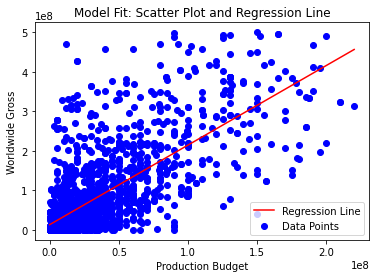

In [52]:
# Plot the model fit (scatter plot and regression line)
# Scatter plot
plt.scatter(X, Y, label='Data Points', color='b', marker='o')

# Linear regression
coefficients = np.polyfit(X, Y, 1)  # Fit a linear regression line (1st degree polynomial)
print(coefficients)
# Generate points for the regression line
regression_line_X = np.linspace(min(X), max(X), 100)
regression_line_Y = np.polyval(coefficients, regression_line_X)

# Plot the regression line
plt.plot(regression_line_X, regression_line_Y, color='r', label='Regression Line')


# Customize the plot
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Model Fit: Scatter Plot and Regression Line')
plt.legend()

# Show the plot
plt.show()


[2.01269448e+00 1.34677372e+07]


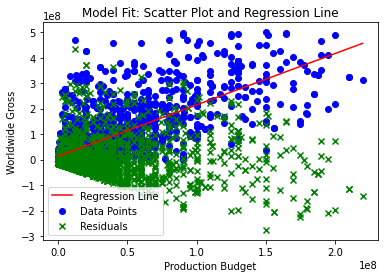

In [53]:
# Plot the model fit (scatter plot and regression line)
# Scatter plot
plt.scatter(X, Y, label='Data Points', color='b', marker='o')

# Linear regression
coefficients = np.polyfit(X, Y, 1)  # Fit a linear regression line (1st degree polynomial)
print(coefficients)
# Generate points for the regression line
regression_line_X = np.linspace(min(X), max(X), 100)
regression_line_Y = np.polyval(coefficients, regression_line_X)

# Plot the regression line
plt.plot(regression_line_X, regression_line_Y, color='r', label='Regression Line')

# Calculate the residuals
predicted_Y = np.polyval(coefficients, X)
residuals = Y - predicted_Y

# Plot the residuals
plt.scatter(X, residuals, label='Residuals', color='g', marker='x')

# Customize the plot
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Model Fit: Scatter Plot and Regression Line')
plt.legend()

# Show the plot
plt.show()


In [54]:
anova_season = ols('popularity ~C(season)', data=movies_and_budgets_df).fit()
anova_season.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.768
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           0.000631
Time:                        13:42:28   Log-Likelihood:                -7270.4
No. Observations:                2167   AIC:                         1.455e+04
Df Residuals:                    2163   BIC:                         1.457e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              10.3006      0.272     37.821      0.000       9.767      10.835
C(season)[T.spring]    -1.6022      0.407     -3.938      0.000      -2.400      -0.804
C(season)[T.summer]    -0.5031      0.418     -1.205      0.229      -1.322       0.316
C(season)[T.winter]    -0.2303      0.410     -0.561      0.575      -1.035       0.574
==============================================================================
Omnibus:                      705.117   Durbin-Watson:                   0.445
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4338.349
Skew:                           1.392   Prob(JB):                         0.00
Kurtosis:                       9.348   Cond. No.                         4.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#OLS Regression on Production Budget
# Determine X and y values
X = movies_and_budgets_df['popularity']
Y = movies_and_budgets_df['worldwide_gross']
X_plus_c = sm.add_constant(X)

# Create an OLS model
model = sm.OLS(Y, X_plus_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     800.9
Date:                Thu, 03 Aug 2023   Prob (F-statistic):          3.47e-150
Time:                        13:42:28   Log-Likelihood:                -42675.
No. Observations:                2167   AIC:                         8.535e+04
Df Residuals:                    2165   BIC:                         8.537e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.103e+06   3.19e+06     -0.345      0.730   -7.37e+06    5.16e+06
popularity   7.55e+06   2.67e+05     28.300      0.000    7.03e+06    8.07e+06
==============================================================================
Omnibus:                      750.763   Durbin-Watson:                   1.539
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3151.847
Skew:                           1.637   Prob(JB):                         0.00
Kurtosis:                       7.918   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
q = """
SELECT numvotes, primary_title, averagerating
FROM movie_ratings
    LEFT JOIN movie_basics
        USING(movie_id)
WHERE numvotes > 9999
;
"""

movie_ratings_df = pd.read_sql(q, im_db_conn)


In [57]:
movie_ratings_df.rename(columns = {'primary_title':'movie'},inplace = True)
movie_ratings_df.head()

,numvotes,movie,averagerating
0,50352,The Legend of Hercules,4.2
1,326657,Moneyball,7.6
2,87288,Hereafter,6.5
3,428142,Mission: Impossible - Ghost Protocol,7.4
4,477771,21 Jump Street,7.2


In [58]:
movies_budgets_ratings_df = movies_and_budgets_df.merge(movie_ratings_df, how='inner', on = 'movie')
movies_budgets_ratings_df.head()

,Unnamed: 0,genre_ids,id_x,original_language,movie,popularity,release_date_x,title,vote_average,vote_count,...,production_budget,domestic_gross,worldwide_gross,foreign_gross,net_gross,release_month,season,budget_size,numvotes,averagerating
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,165000000,217581232,494870992,277289760,329870992,3,spring,extra_large,611299,8.1
1,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,...,95000000,88768303,223050874,134282571,128050874,2,winter,extra_large,165108,5.9
2,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635,...,130000000,148415853,321887208,173471355,191887208,11,fall,extra_large,207488,7.3
3,11,"[10751, 14, 12]",12155,en,Alice in Wonderland,22.020,2010-03-05,Alice in Wonderland,6.6,8713,...,3000000,0,0,0,-3000000,3,spring,small,358813,6.5
4,2081,[],423971,en,Alice in Wonderland,0.600,2010-01-01,Alice in Wonderland,6.0,1,...,3000000,0,0,0,-3000000,1,winter,small,358813,6.5


In [59]:
anova_season = ols('box_office ~C(director)', data=rotten_tomatoes_consolidated_df).fit()
anova_season.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             box_office   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1.031
Date:                Thu, 03 Aug 2023   Prob (F-statistic):              0.499
Time:                        13:42:28   Log-Likelihood:                -4656.3
No. Observations:                 258   AIC:                             9787.
Df Residuals:                      21   BIC:                         1.063e+04
Df Model:                         236                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       5.981e+05   5.84e+07      0.010      0.992   -1.21e+08    1.22e+08
C(director)[T.Adam Shankman]                                    8.187e+07   8.26e+07      0.991      0.333   -8.99e+07    2.54e+08
C(director)[T.Alex Kendrick|Stephen Kendrick]                   9.529e+06   8.26e+07      0.115      0.909   -1.62e+08    1.81e+08
C(director)[T.Alex Proyas]                                      1.441e+08   8.26e+07      1.745      0.096   -2.77e+07    3.16e+08
C(director)[T.Alexander Payne]                                  1.075e+07   8.26e+07      0.130      0.898   -1.61e+08    1.83e+08
C(director)[T.Andrew Dominik]                                   3.302e+06   8.26e+07      0.040      0.968   -1.69e+08    1.75e+08
C(director)[T.Andrew Stanton|Mark Atkins]                       7.246e+07   8.26e+07      0.877      0.390   -9.93e+07    2.44e+08
C(director)[T.Andrew Tennant|Andy Tennant]                       1.77e+08   8.26e+07      2.142      0.044    5.17e+06    3.49e+08
C(director)[T.Andrzej Bartkowiak]                               3.072e+07   7.15e+07      0.429      0.672   -1.18e+08     1.8e+08
C(director)[T.Ang Lee]                                          3.954e+06   7.15e+07      0.055      0.956   -1.45e+08    1.53e+08
C(director)[T.Anthony Bell|Ben Gluck|Benjamin Gluck]            2.448e+07   8.26e+07      0.296      0.770   -1.47e+08    1.96e+08
C(director)[T.Anthony Russo|Joe Russo]                          7.501e+07   8.26e+07      0.908      0.374   -9.68e+07    2.47e+08
C(director)[T.Anton Corbijn]                                    1.344e+07   8.26e+07      0.163      0.872   -1.58e+08    1.85e+08
C(director)[T.Ash Brannon]                                      8.807e+06   8.26e+07      0.107      0.916   -1.63e+08    1.81e+08
C(director)[T.Barry Levinson]                                   1.909e+07   7.15e+07      0.267      0.792    -1.3e+08    1.68e+08
C(director)[T.Ben Stassen]                                      1.299e+07   8.26e+07      0.157      0.877   -1.59e+08    1.85e+08
C(director)[T.Ben Younger]                                      4.454e+06   8.26e+07      0.054      0.958   -1.67e+08    1.76e+08
C(director)[T.Benson Lee]                                        8.29e+06   8.26e+07      0.100      0.921   -1.64e+08     1.8e+08
C(director)[T.Bill Duke]                                        9.975e+06   8.26e+07      0.121      0.905   -1.62e+08    1.82e+08
C(director)[T.Brad Furman]                                      1.483e+07   8.26e+07      0.179      0.859   -1.57e+08    1.87e+08
C(director)[T.Brian Levant]                                     8.051e

In [60]:
movies_budgets_ratings_df.shape

(1450, 22)

In [61]:
#OLS Regression on Production Budget
# Determine X and y values
X = movies_budgets_ratings_df['production_budget']
Y = movies_budgets_ratings_df['popularity']
X_plus_c = sm.add_constant(X)

# Create an OLS model
model = sm.OLS(Y, X_plus_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     263.9
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           1.24e-54
Time:                        13:42:28   Log-Likelihood:                -4693.6
No. Observations:                1450   AIC:                             9391.
Df Residuals:                    1448   BIC:                             9402.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.8565      0.219     44.942      0.000       9.426      10.287
production_budget  6.429e-08   3.96e-09     16.244      0.000    5.65e-08    7.21e-08
==============================================================================
Omnibus:                      655.034   Durbin-Watson:                   0.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9766.078
Skew:                           1.706   Prob(JB):                         0.00
Kurtosis:                      15.248   Cond. No.                     7.51e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.51e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[6.42907608e-08 9.85648261e+00]


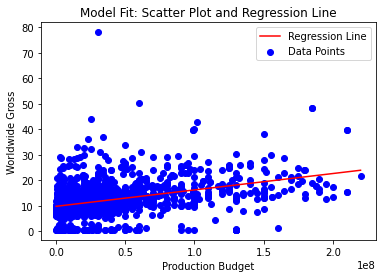

In [62]:
# Plot the model fit (scatter plot and regression line)
# Scatter plot
plt.scatter(X, Y, label='Data Points', color='b', marker='o')

# Linear regression
coefficients = np.polyfit(X, Y, 1)  # Fit a linear regression line (1st degree polynomial)
print(coefficients)
# Generate points for the regression line
regression_line_X = np.linspace(min(X), max(X), 100)
regression_line_Y = np.polyval(coefficients, regression_line_X)

# Plot the regression line
plt.plot(regression_line_X, regression_line_Y, color='r', label='Regression Line')


# Customize the plot
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Model Fit: Scatter Plot and Regression Line')
plt.legend()

# Show the plot
plt.show()


In [63]:
rotten_tomatoes_df.head()

,id,review,rating_x,fresh,critic,top_critic,publisher,date,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,theater_month
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000,108,Entertainment One,8
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000,108,Entertainment One,8
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000,108,Entertainment One,8
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000,108,Entertainment One,8
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000,108,Entertainment One,8


In [69]:
movies_and_budgets_df.head()

,Unnamed: 0,genre_ids,id_x,original_language,movie,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross,foreign_gross,net_gross,release_month,season,budget_size
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,"Mar 26, 2010",165000000,217581232,494870992,277289760,329870992,3,spring,extra_large
2,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995",30000000,191796233,364545516,172749283,334545516,11,fall,large
3,2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995",30000000,191796233,364545516,172749283,334545516,11,fall,large
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,17,"Feb 12, 2010",95000000,88768303,223050874,134282571,128050874,2,winter,extra_large
9,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635,47,"Nov 5, 2010",130000000,148415853,321887208,173471355,191887208,11,fall,extra_large


In [68]:
movies_and_budgets_df.loc[movies_and_budgets_df['title'] == 'Frozen']

,Unnamed: 0,genre_ids,id_x,original_language,movie,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,production_budget,domestic_gross,worldwide_gross,foreign_gross,net_gross,release_month,season,budget_size


In [ ]:
#Export accident_df to csv for further analysis in Tableau
movies_and_budgets_df.to_csv('data/cleaned_movies_and_budgets.csv')
rotten_tomatoes_df.to_csv('data/cleaned_rotten_tomatoes.csv')